In [1]:
import sys
sys.path.insert(0, r"..//..//")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from hotstepper.basis.Bases import Bases
from hotstepper.basis.Basis import Basis
from hotstepper.Steps import Steps
from hotstepper.utilities.helpers import rolling_window, prepare_datetime,get_epoch_start,get_epoch_end,float_to_date

import warnings
warnings.filterwarnings("ignore")


In [2]:
df_gbpusd_h1 = pd.read_csv(r'..//..//data//forex//GBPUSD_H1.csv',delimiter='\t',parse_dates=['Time'])
df_gbpusd_h1.head()


,Time,Open,High,Low,Close,Volume
0,2013-01-28 10:00:00,1.57474,1.57475,1.57243,1.57243,8337
1,2013-01-28 11:00:00,1.57245,1.57263,1.57050,1.57050,8119
2,2013-01-28 12:00:00,1.57049,1.57329,1.57049,1.57257,11026
3,2013-01-28 13:00:00,1.57256,1.57389,1.57102,1.57366,11717
4,2013-01-28 14:00:00,1.57366,1.57431,1.57133,1.57171,11911


<AxesSubplot:>

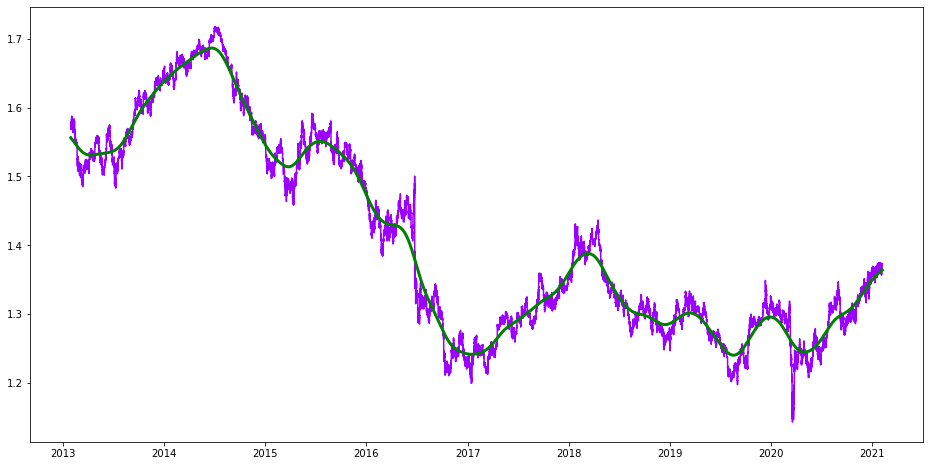

In [3]:
gbpusd_h1_open_steps = Steps.read_dataframe(df_gbpusd_h1,start = 'Time',weight='Open',convert_delta=True)
ax = gbpusd_h1_open_steps.plot()
gbpusd_h1_open_steps.smooth_plot(ax=ax,color='g',linewidth=3)



In [4]:
gbpusd_h1_open_steps(pd.Timestamp(2020,1,1))


array([1.32463])

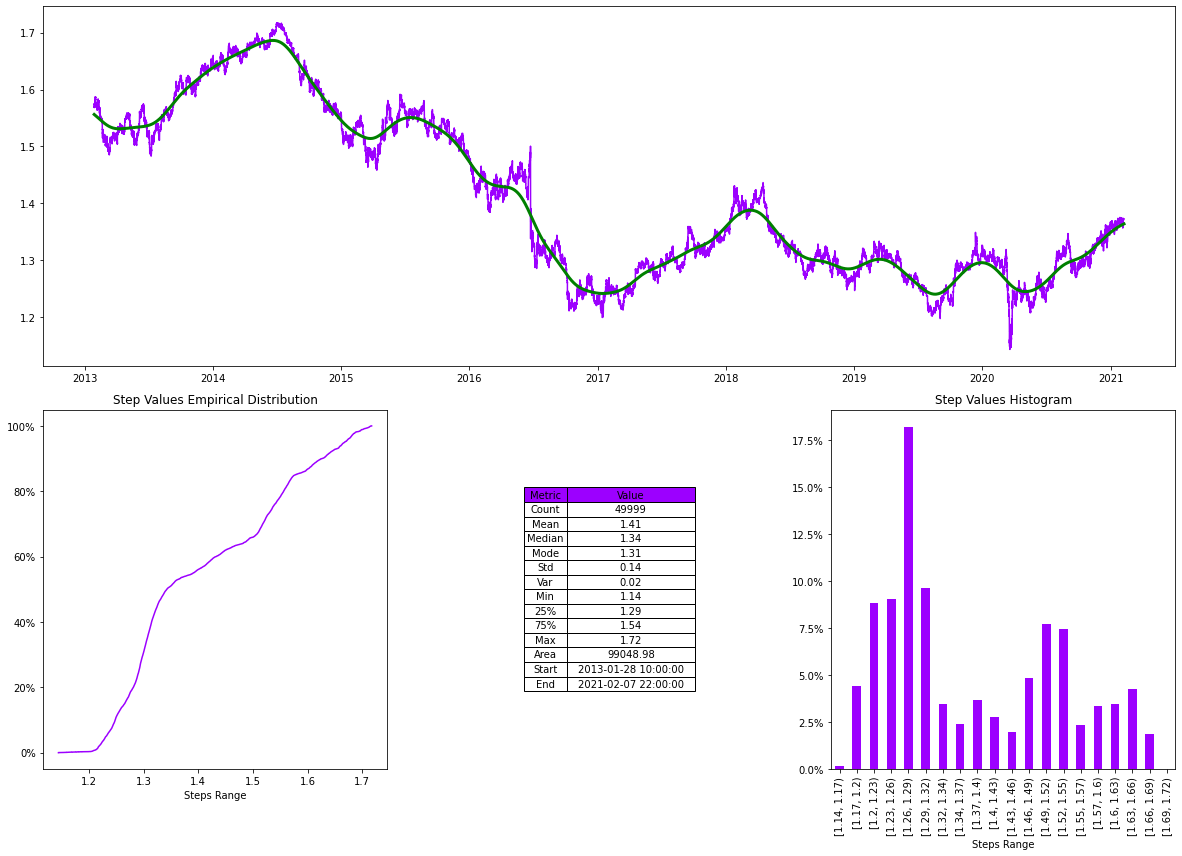

In [5]:
gbpusd_h1_open_steps.summary();

We can look more closely at how this pair moved differently between 2017 and 2018, we first create new steps for these date ranges and have a look at what we have.

In [6]:
gbpusd_h1_open_steps_2017 = gbpusd_h1_open_steps.clip(lbound=pd.Timestamp(2017,1,1),ubound=pd.Timestamp(2017,12,31))
gbpusd_h1_open_steps_2018 = gbpusd_h1_open_steps.clip(lbound=pd.Timestamp(2018,1,1),ubound=pd.Timestamp(2018,12,31))

(gbpusd_h1_open_steps_2018.integrate())/gbpusd_h1_open_steps_2017.integrate()

1.0362126907416789

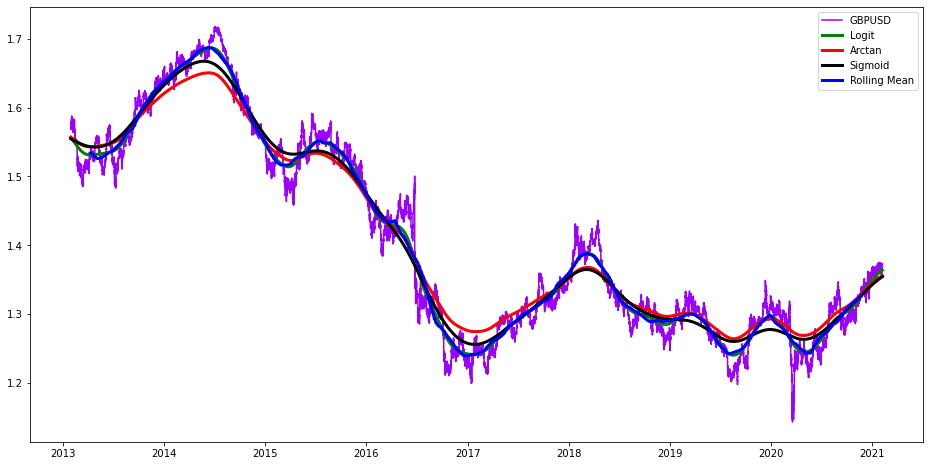

In [7]:
ax = gbpusd_h1_open_steps.plot(label='GBPUSD')
gbpusd_h1_open_steps.smooth_plot(ax=ax,color='g',linewidth=3,label='Logit')
gbpusd_h1_open_steps.smooth_plot(ax=ax,color='r',linewidth=3,smooth_basis=Basis(Bases.arctan),label='Arctan')
gbpusd_h1_open_steps.smooth_plot(ax=ax,color='black',linewidth=3,smooth_basis=Basis(Bases.sigmoid),label='Sigmoid')


#and the rolling mean
gbpusd_h1_open_steps.plot_rolling_step(ax=ax,rolling_function=np.mean,window=2500,pre_mid_post='mid',color='blue',linewidth=3,label='Rolling Mean')

ax.legend()


From the plot of the logit, arctan, sigmoid and centred rolling mean of the data, we can see the logit basis plot is very similar to the centred rolling mean, with the advantage of not needing the warm-up at the start and tends to be less sensitive to extreme changes, leading to a smoother curve.

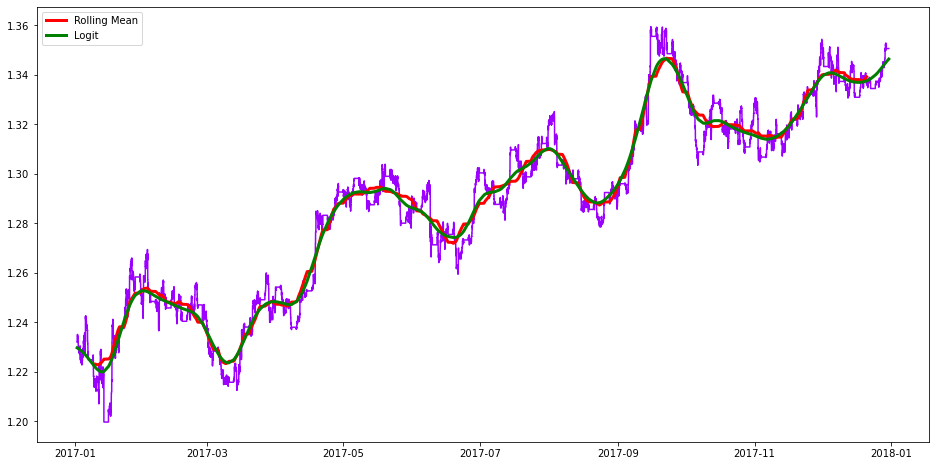

In [8]:
gbpusd_h1_open_steps_2017 = gbpusd_h1_open_steps.clip(pd.Timestamp(2017,1,1),pd.Timestamp(2017,12,31))
ax = gbpusd_h1_open_steps_2017.plot()
gbpusd_h1_open_steps_2017.plot_rolling_step(ax=ax,rolling_function=np.mean,window=300,pre_mid_post='mid',color='r',linewidth=3,label='Rolling Mean')
gbpusd_h1_open_steps_2017.smooth_plot(ax=ax,color='g',linewidth=3,label='Logit')

ax.legend()

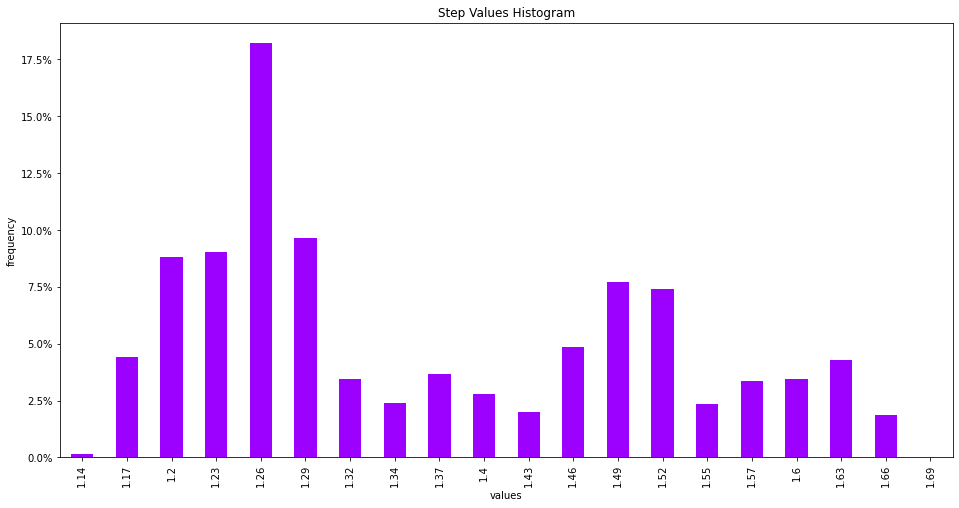

In [9]:
ax = gbpusd_h1_open_steps.histogram_plot(bins=20,xlabel='values',ylabel='frequency',label_style='int')
#ax.set_xticklabels(ax.get_xticks(), rotation = 0);

<AxesSubplot:title={'center':'Step Values Empirical Distribution'}, xlabel='Steps Range'>

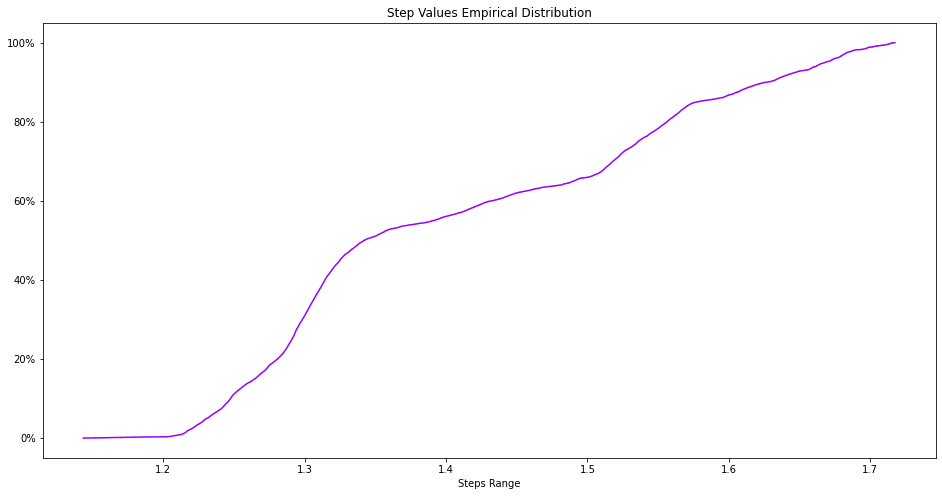

In [10]:
gbpusd_h1_open_steps.ecdf_plot()